
# Starting by loading the data


In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from scipy.stats import zscore

In [2]:
#loading the dataset given and viewing the head(first few lines)
df = pd.read_csv('netflix-data.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#viewing the last few lines of the dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [4]:
#seeing the columns of the dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
#viewing the datatypes of the column
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [6]:
#viewing infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.shape

(8807, 12)

#Cleaning the data now!!

In [8]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [9]:
#rm duplicate rows
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [13]:
#handling the missing values
df.fillna({'director' :'unknown', 'cast': 'Unknown' , 'country' : 'Unknown', 'rating': 'Unknown'}, inplace=True)
df.dropna(subset = ['date_added', 'duration'], inplace=True)

In [14]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [15]:
#rm spaces from the data
df['data_added'] = df['date_added'].str.strip()

In [18]:
#conversion of the 'data_added' col to date-time format
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')

In [19]:
# Converting 'duration' column
df['duration'] = df['duration'].astype(str)
df['duration'] = df['duration'].str.extract(r'(\d+)')
df['duration'] = df['duration'].astype(float).astype(int)

#EDA- explanatory data analysis

In [21]:
print(df.describe())
print(df.nunique())

                          date_added  release_year     duration
count                           8706   8794.000000  8794.000000
mean   2019-05-23 09:23:31.716057856   2014.183534    69.920173
min              2008-01-01 00:00:00   1925.000000     1.000000
25%              2018-04-20 00:00:00   2013.000000     2.000000
50%              2019-07-12 00:00:00   2017.000000    88.000000
75%              2020-08-26 00:00:00   2019.000000   106.000000
max              2021-09-25 00:00:00   2021.000000   312.000000
std                              NaN      8.823527    50.797005
show_id         8794
type               2
title           8794
director        4528
cast            7682
country          749
date_added      1698
release_year      74
rating            15
duration         210
listed_in        513
description     8762
data_added      1714
dtype: int64


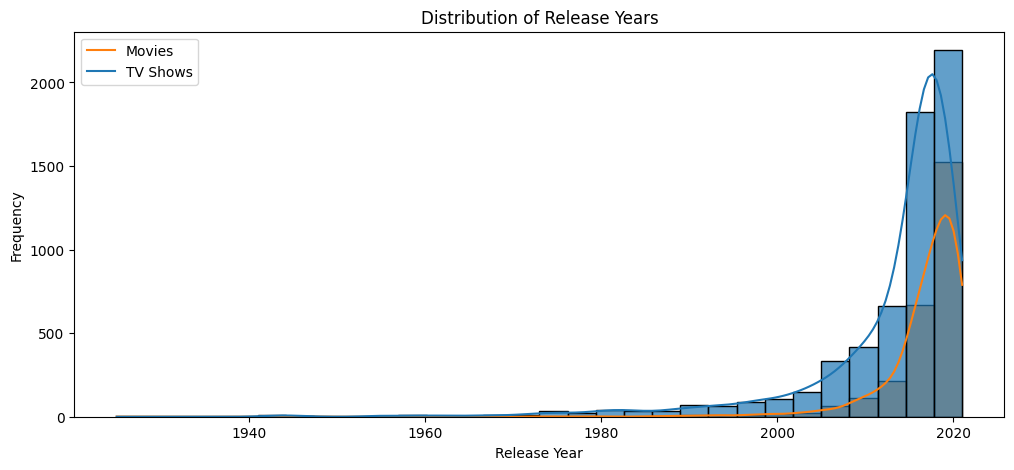

In [32]:
plt.figure(figsize = (12, 5))
sns.histplot(df, x = "release_year", hue = "type", bins = 30, kde = True, color = "cyan", alpha = 0.7) # Change 'palette' to 'color'
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.legend(["Movies", "TV Shows"])
plt.show()

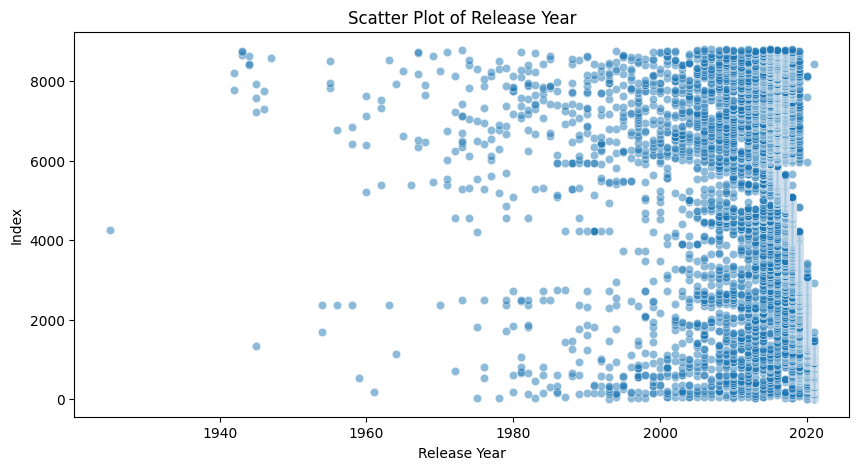

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['release_year'], y=df.index, alpha=0.5)
plt.title('Scatter Plot of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Index')
plt.show()

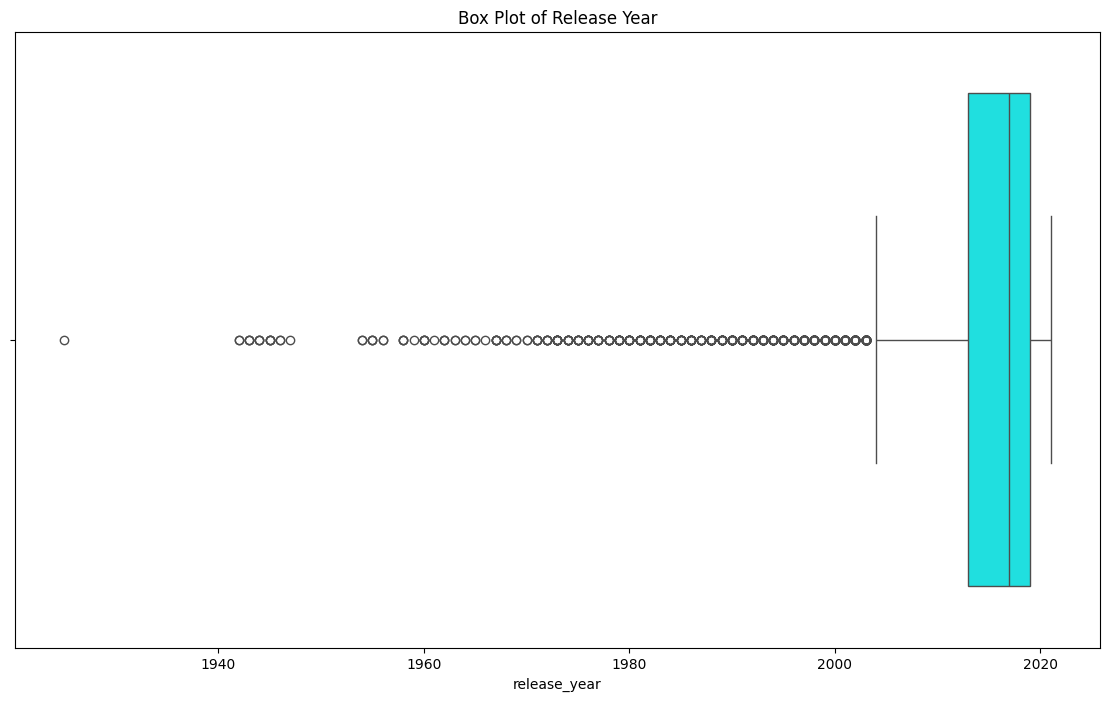

In [36]:
plt.figure(figsize=(14,8))
sns.boxplot(x=df['release_year'], color='cyan')
plt.title("Box Plot of Release Year")
plt.show()

Z Score (Total outliers in the release_year)

In [38]:
z_scores = np.abs(zscore(df[['release_year']]))
outliers = (z_scores > 3).sum()
print(f"Total outliers in the release_year: {outliers[0]}")

Total outliers in the release_year: 217


<ipython-input-38-7f83fb246d77>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Total outliers in the release_year: {outliers[0]}")


In [39]:
df['duration'].unique()

array([ 90,   2,   1,  91, 125,   9, 104, 127,   4,  67,  94,   5, 161,
        61, 166, 147, 103,  97, 106, 111,   3, 110, 105,  96, 124, 116,
        98,  23, 115, 122,  99,  88, 100,   6, 102,  93,  95,  85,  83,
       113,  13, 182,  48, 145,  87,  92,  80, 117, 128, 119, 143, 114,
       118, 108,  63, 121, 142, 154, 120,  82, 109, 101,  86, 229,  76,
        89, 156, 112, 107, 129, 135, 136, 165, 150, 133,  70,  84, 140,
        78,   7,  64,  59, 139,  69, 148, 189, 141, 130, 138,  81, 132,
        10, 123,  65,  68,  66,  62,  74, 131,  39,  46,  38,   8,  17,
       126, 155, 159, 137,  12, 273,  36,  34,  77,  60,  49,  58,  72,
       204, 212,  25,  73,  29,  47,  32,  35,  71, 149,  33,  15,  54,
       224, 162,  37,  75,  79,  55, 158, 164, 173, 181, 185,  21,  24,
        51, 151,  42,  22, 134, 177,  52,  14,  53,  57,  28,  50,  26,
        45, 171,  27,  44, 146,  20, 157, 203,  41,  30, 194, 233, 237,
       230, 195, 253, 152, 190, 160, 208, 180, 144, 174, 170, 19

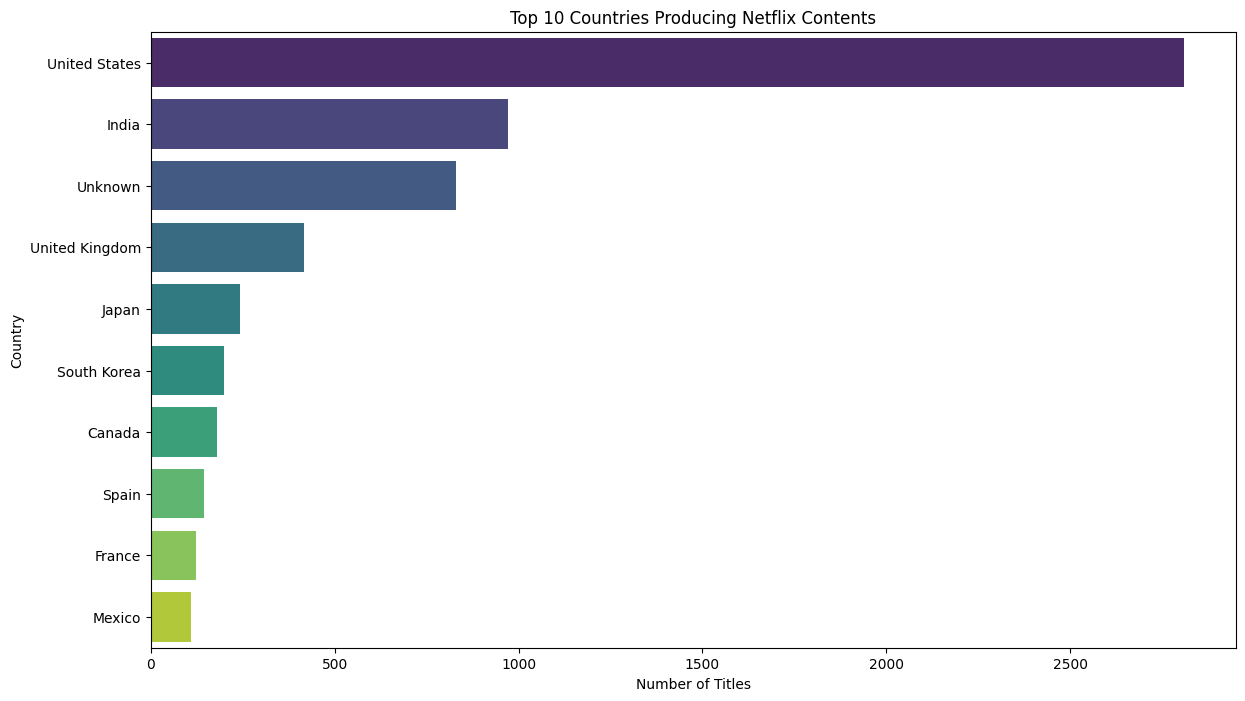

In [44]:
plt.figure(figsize = (14, 8))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x = top_countries.values, y = top_countries.index, hue = top_countries.index, palette = 'viridis', legend = False)
plt.title("Top 10 Countries Producing Netflix Contents")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

#Preprocessing techniques for ML

In [45]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...","September 25, 2021"
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","September 24, 2021"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"September 24, 2021"
3,s4,TV Show,Jailbirds New Orleans,unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","September 24, 2021"
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"September 24, 2021"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...","November 20, 2019"
8803,s8804,TV Show,Zombie Dumb,unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...","July 1, 2019"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,"November 1, 2019"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","January 11, 2020"


In [46]:
#Encoding Categorical VarType using LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [47]:
#feature scaling on 'release year'
scaler = MinMaxScaler()
df['release_year_scaled'] = scaler.fit_transform(df[['release_year']])

In [48]:
# One-Hot Encoding for 'rating' and 'listed_in'
ohe = OneHotEncoder(drop='first', sparse_output=False)

In [50]:
# Fitting encoder
encoded_data = ohe.fit_transform(df[['rating', 'listed_in']])

In [58]:
# Get feature names after encoding
rating_categories = ohe.categories_[0][1:] # Excluding the dropped category
listed_in_categories = ohe.categories_[1][1:]  # Excluding the dropped category


In [57]:
# Creating DataFrame using encoded_data (renamed from encoded_array)
encoded_df = pd.DataFrame(encoded_data, columns=list(rating_categories) + list(listed_in_categories))

In [60]:
df = pd.concat([df, encoded_df], axis=1)

In [61]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,"TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","TV Dramas, TV Thrillers","TV Dramas, Teen TV Shows","TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","TV Horror, TV Mysteries, TV Thrillers","TV Horror, TV Mysteries, Teen TV Shows","TV Horror, Teen TV Shows","TV Sci-Fi & Fantasy, TV Thrillers",TV Shows,Thrillers
0,s1,0.0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020.0,PG-13,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,s2,1.0,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,s3,1.0,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021.0,TV-MA,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,s4,1.0,Jailbirds New Orleans,unknown,Unknown,Unknown,2021-09-24,2021.0,TV-MA,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,s5,1.0,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df.drop(columns=['release_year', 'rating', 'listed_in'])

,show_id,type,title,director,cast,country,date_added,duration,description,data_added,...,"TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","TV Dramas, TV Thrillers","TV Dramas, Teen TV Shows","TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","TV Horror, TV Mysteries, TV Thrillers","TV Horror, TV Mysteries, Teen TV Shows","TV Horror, Teen TV Shows","TV Sci-Fi & Fantasy, TV Thrillers",TV Shows,Thrillers
0,s1,0.0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,90.0,"As her father nears the end of his life, filmm...","September 25, 2021",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,s2,1.0,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2.0,"After crossing paths at a party, a Cape Town t...","September 24, 2021",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,s3,1.0,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,1.0,To protect his family from a powerful drug lor...,"September 24, 2021",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,s4,1.0,Jailbirds New Orleans,unknown,Unknown,Unknown,2021-09-24,1.0,"Feuds, flirtations and toilet talk go down amo...","September 24, 2021",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,s5,1.0,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2.0,In a city of coaching centers known to train I...,"September 24, 2021",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7254,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7406,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7847,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, 0 to 8182
Columns: 540 entries, show_id to Thrillers
dtypes: datetime64[ns](1), float64(530), object(9)
memory usage: 36.4+ MB


In [66]:
# Splitting dataset into 70% Training, 15% Validation, 15% Testing
train_data, temp_data = train_test_split(df, test_size=0.30, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.50, random_state=42)

print("Training Set Shape:", train_data.shape)
print("Validation Set Shape:", val_data.shape)
print("Testing Set Shape:", test_data.shape)

Training Set Shape: (6164, 540)
Validation Set Shape: (1321, 540)
Testing Set Shape: (1322, 540)


#Netflix Dataset Analysis & Preprocessing (Report summary)



> This report documents the analysis and preprocessing of a Netflix dataset containing information about movies and TV shows. The primary objective was to clean, explore, and prepare the data for machine learning applications. This involved handling missing values, converting data types, encoding categorical features, and performing exploratory data analysis (EDA) to gain insights.

Data Cleaning and Preprocessing
Handling Missing Values: Missing values in columns like 'director', 'cast', 'country', and 'rating' were addressed by imputation using logical placeholders like "Unknown." Rows with missing 'date_added' or 'duration' were removed due to their importance for analysis.
Data Type Conversion and Standardization:
The 'date_added' column was converted to datetime format for easier temporal analysis.
The 'duration' column, initially containing mixed numerical and categorical data (minutes and seasons), was preprocessed to extract numerical duration values in minutes.
Encoding Categorical Features:
The 'type' feature (Movie/TV Show) was encoded using Label Encoding for binary classification.
'rating' and 'listed_in' features were transformed using One-Hot Encoding to create numerical representations for these categorical values, mitigating sparsity and overfitting.
The 'release_year' feature was scaled using MinMaxScaler to normalize its range for better model performance.
Exploratory Data Analysis (EDA) and Insights
Release Year Distribution: A histogram visualized the distribution of release years, revealing a significant increase in content production by Netflix in recent years. While movies still outnumber TV shows, both content types have experienced growth in recent years.
Content Production by Country: Analysis of the 'country' feature indicated that the USA is the dominant content producer on Netflix, followed by India, the UK, and Canada. This suggests a primary focus on English-speaking markets, with a growing presence of global content.
Release Year vs. Rating (Scatter Plot): A scatter plot exploring the relationship between release year and rating revealed a wider spread in ratings for older content, potentially due to classic films receiving higher critical acclaim over time.
Outlier Detection: Using z-score analysis to check outlier in the Release Year feature in the Dataset
Top Content Producing Countries: A barplot visualized the top content producing countries, showcasing the dominance of the USA in content production.
Limitations
Duration Column Complexity: The initial format of the 'duration' column required careful extraction of numerical values for analysis.
Categorical Encoding Considerations: Choosing appropriate encoding methods for categorical features like 'rating' and 'listed_in' was crucial to balance informativeness and model complexity.
Missing Value Handling Strategy: Decisions on imputing or removing missing data were made based on the context and potential impact on analysis.
Data Splitting for Machine Learning
The dataset was split into training (70%), validation (15%), and testing (15%) sets to prepare for machine learning model development and evaluation.

This analysis and preprocessing pipeline provides a solid foundation for further investigation and the development of machine learning models for tasks such as content recommendation or predicting viewer preferences on Netflix. Further research and feature engineering could enhance model performance and uncover deeper insights into this data.

